# **Visualisation et statistiques descriptives**
---

## Introduction<a class="anchor" id="partie1"></a>

Ce notebook contient les codes nécessaires à la visualisation et les statistiques descriptives de notre base de données.

## Sommaire

* [Introduction](#partie1)
* [Statistiques descriptives](#partie2)
* [Visualisation](#partie3)
    * [Données de PIB](#partie31)
    * [Données d'heures de travail](#partie32)


In [1]:
!pip install -r requirements.txt

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
# Importation des données
#df = pd.read_excel("Données_produites/base_de_données_v1.xlsx")

#Pour voir les changements avec la suppression des données manquantes intermédiaires utiliser:
df = pd.read_excel("base_de_données_v1.xlsx")


# Indexation
df = df.set_index('Unnamed: 0')

## Statistiques descriptives <a class="anchor" id="partie2"></a>

### Visualisation et nettoyage des données manquantes <a class="anchor" id="partie21"></a>

Dans une volonté de rendre compte des valeurs manquantes à notre dataframe nous créons un dataframe qui comprend l'ensemble des valeurs manquantes 

In [4]:
df_missing_binary = df.isnull().astype(int)
df_missing_binary

,CPI_Austria,PIB_Austria,LT_IR_Austria,ST_IR_Austria,WH_Austria,P_Growth_Austria,CPI_Belgium,PIB_Belgium,LT_IR_Belgium,ST_IR_Belgium,...,LT_IR_Switzerland,ST_IR_Switzerland,WH_Switzerland,P_Growth_Switzerland,CPI_United_Kingdom,PIB_United_Kingdom,LT_IR_United_Kingdom,ST_IR_United_Kingdom,WH_United_Kingdom,P_Growth_United_Kingdom
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1995-Q1,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1995-Q2,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1995-Q3,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1995-Q4,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1996-Q1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-Q4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
2024-Q1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
2024-Q2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1


In [5]:
df_nan = df.isna()
df_nan = pd.DataFrame({
    "TIME_PERIOD_WITH_NAN": df_nan.apply(lambda col: list(df.index[col]), axis = 0)
})
df_nan.to_csv("df_nan.csv", index=True, encoding="utf-8")
print(df_nan)

                                                      TIME_PERIOD_WITH_NAN
CPI_Austria                           [1995-Q1, 1995-Q2, 1995-Q3, 1995-Q4]
PIB_Austria                                                      [2024-Q4]
LT_IR_Austria                                                           []
ST_IR_Austria                                                           []
WH_Austria                                                              []
...                                                                    ...
PIB_United_Kingdom       [2020-Q4, 2021-Q1, 2021-Q2, 2021-Q3, 2021-Q4, ...
LT_IR_United_Kingdom                                                    []
ST_IR_United_Kingdom                                                    []
WH_United_Kingdom                                                       []
P_Growth_United_Kingdom  [2022-Q1, 2022-Q2, 2022-Q3, 2022-Q4, 2023-Q1, ...

[168 rows x 1 columns]


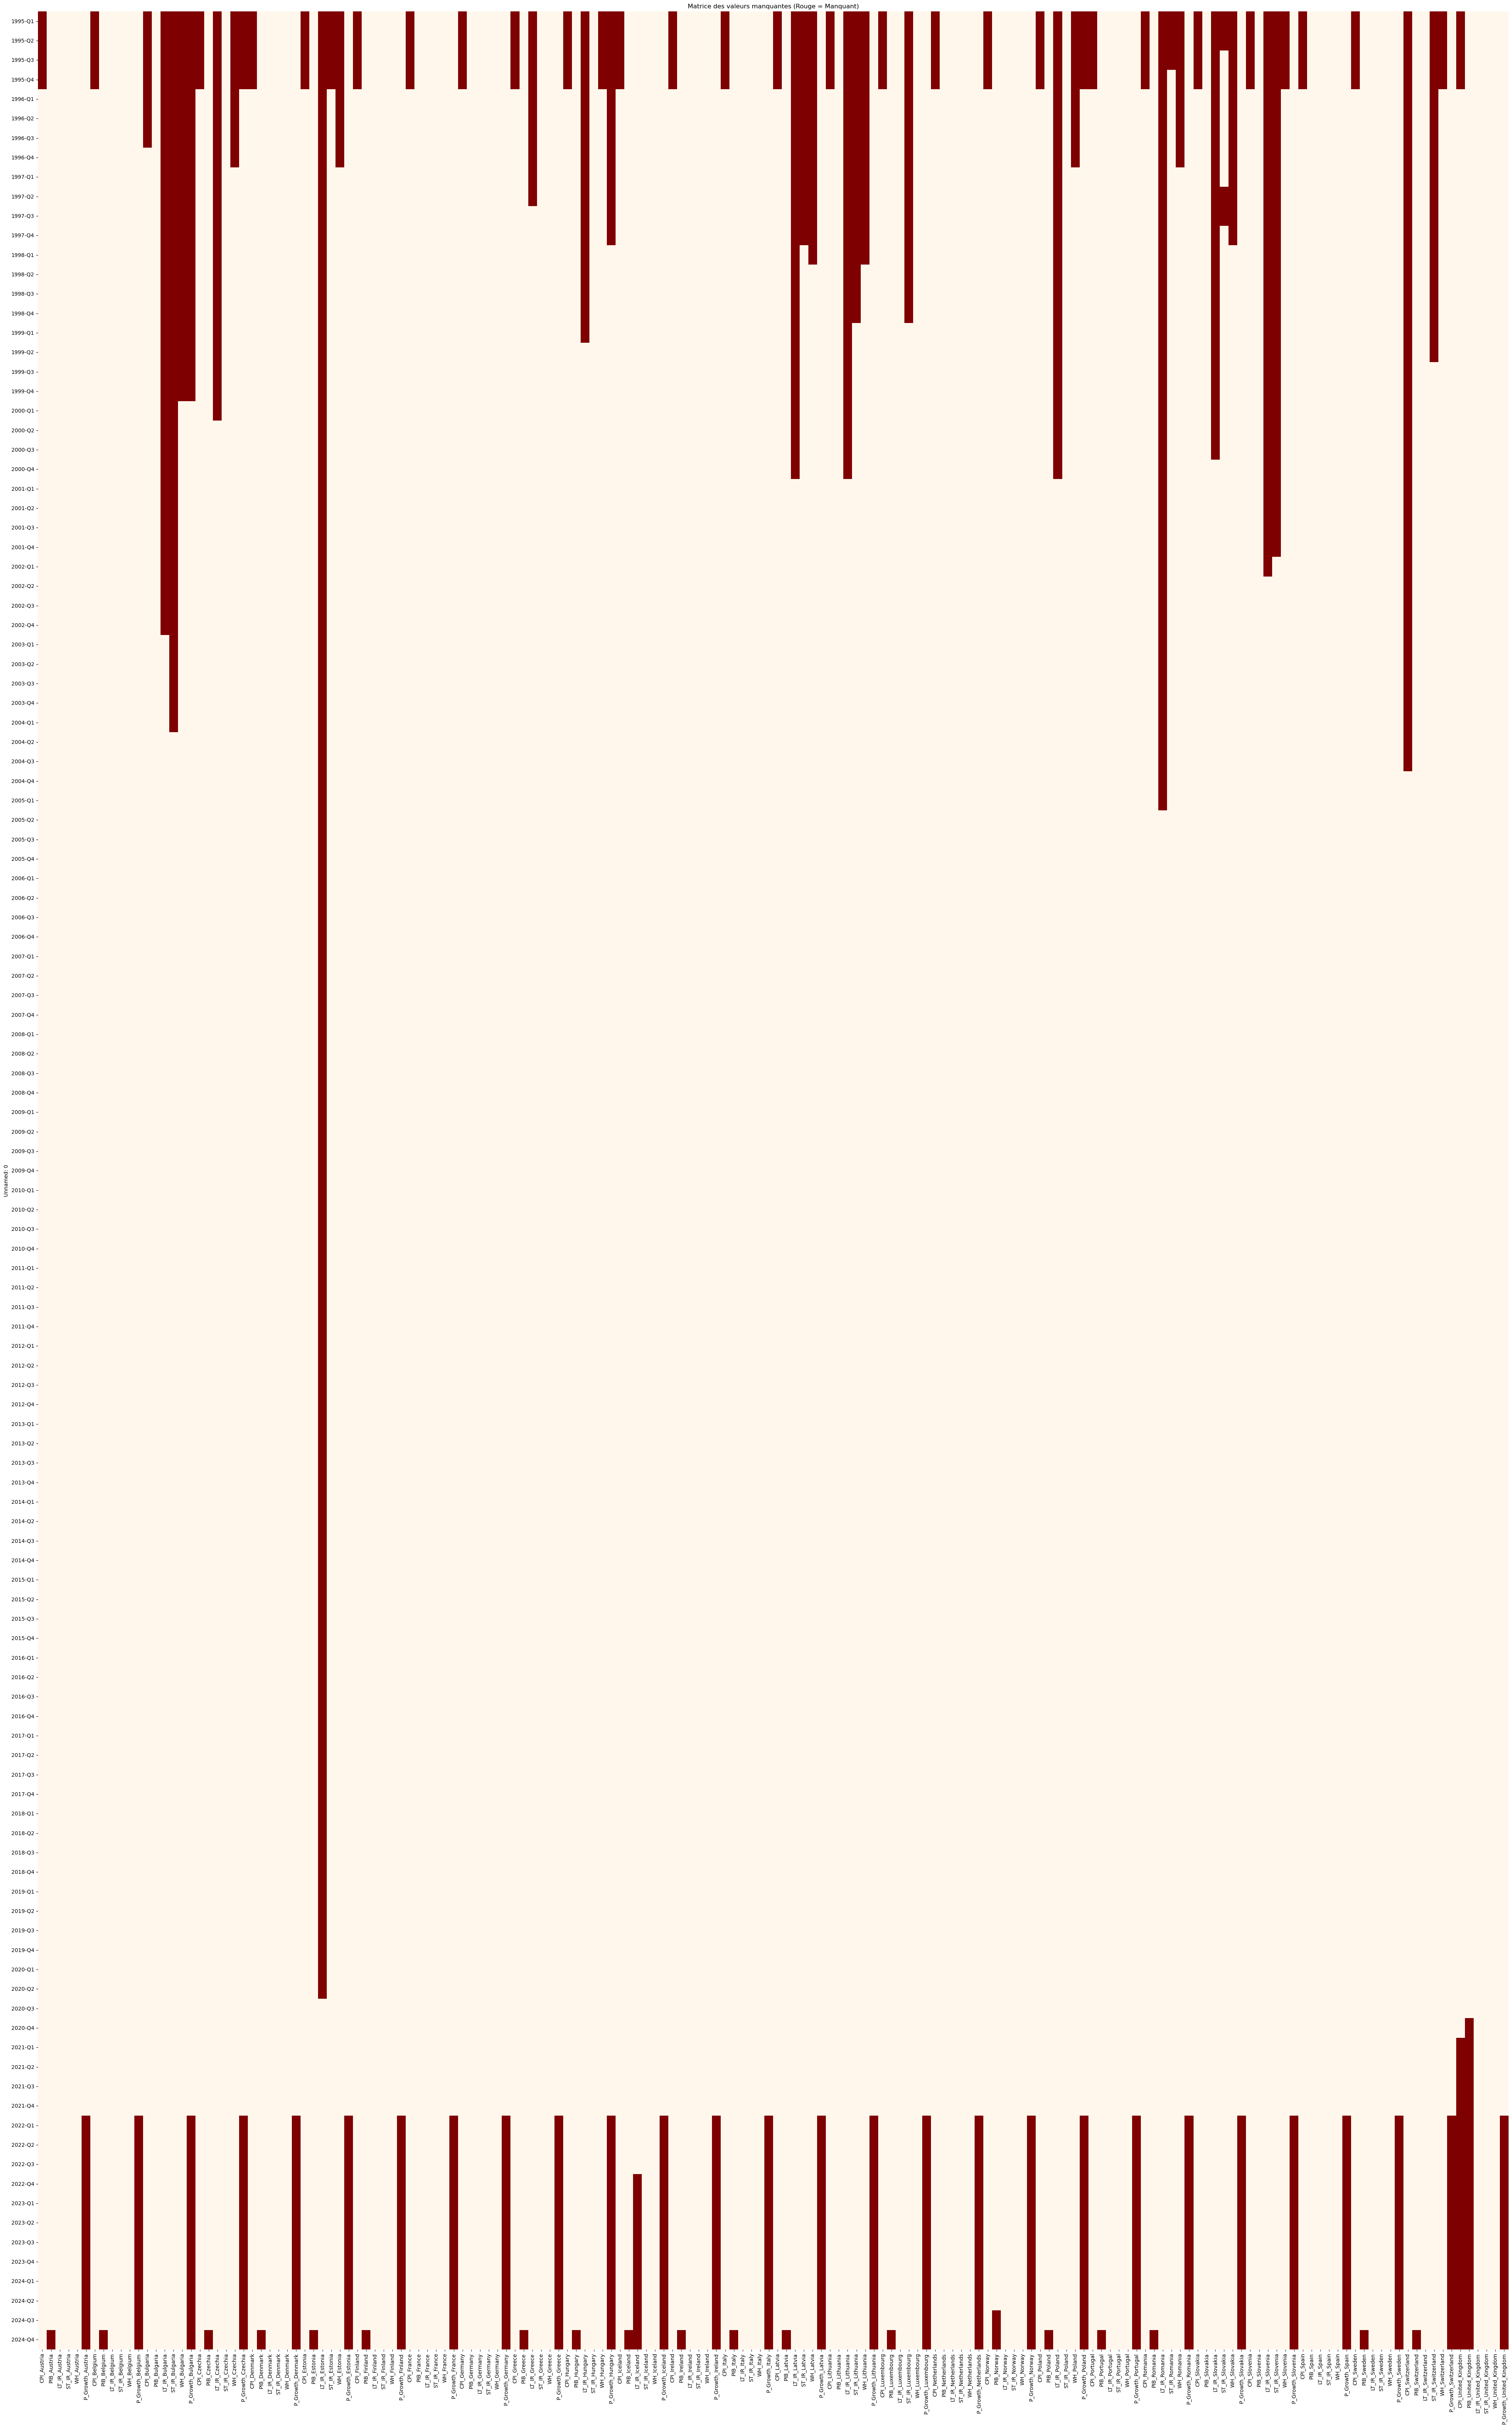

In [6]:
# Définir la figure avec un affichage interactif
fig, ax = plt.subplots(figsize=(50, 80))

# Utiliser seaborn pour une meilleure visualisation sans grille
sns.heatmap(df_missing_binary, cmap="OrRd", cbar=False, linewidths=0, ax=ax, square=False)

# Ajouter un titre
ax.set_title("Matrice des valeurs manquantes (Rouge = Manquant)")

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Afficher la figure
plt.show()

In [ ]:
#Pourcentage de données manquantes par variable
percentage_missing=((df_missing_binary.sum())/df_missing_binary.shape[0])*100

#On ne garde que les colonnes ayant des missing values
percentage_missing=percentage_missing[percentage_missing>0]
percentage_missing = percentage_missing.sort_values(ascending=False)

'''
Nous avons un problème avec l'Estonie, 85% des données pour les taux d'intérêt sont des valeurs manquantes
J'ai revérifié sur le site de l'OCDE et c'est un problème qui vient de leur bases de données. Comme c'est une 
un pourcentage considérable, on devrait peut-être retirer l'Estonie de notre analyse

Pour les données qui sont "entrecoupées" (on dirait un chemin de la route)--> c'est les Working Hours. On peut appliquer le même 
interpolation qu'on a faite pour construire le df. 

--> Voir tentative d'interpolation dans le notebook data.ipynb
Un problème persiste avec les données qui sont au début ou à la fin de la période temporelle, il faudra envisager
une autre méthode
'''
percentage_missing


### Statistiques descriptives intra-pays <a class="anchor" id="partie22"></a>

#### Résumé statistique des variables <a class="anchor" id="partie221"></a>

Nous allons tout d'abord effectuer des statistiques descriptives par pays des variables que nous avons collectées. Afin de mieux déterminer les effets de la politique monétaire et les chocs, nous avons privilégié une analyse centrée sur les périodes suivantes: 
- Avant 2008 (1995-2007)
- Après 2008 (2008-2019)
- Post-COVID (2020-2024)

Quelques lignes de code préliminaires

In [ ]:
#Fonction qui construit un vecteur contenant le nom des variables
def variables_pays(pays):
    variable_pays=[f'CPI_{pays}',f'PIB_{pays}',f'LT_IR_{pays}',f'ST_IR_{pays}',f'WH_{pays}',f'P_Growth_{pays}']
    return(variable_pays)

In [ ]:
#Conversion des index du dataframe en datetime
df.index = pd.PeriodIndex(df.index, freq='Q')  #conversion en PeriodIndex
df.index = df.index.to_timestamp() #Conversion en DateTime
print(type(df.index))

''' 
Ici je ne suis pas sûr:
- pour faire des analyses en séries temporelles, il faut que les index soient des datetime
- j'ai donc converti chaque trimestre en la première date de chaque trimestre. 
- pour des graphes, et pour transformer les sorties, on peut utiliser : df.index.strftime('%Y-Q%q')
- je ne sais pas s'il y a une meileure façon de faire

'''



In [ ]:
#On divise le df en 3 (correspondant à chaque période)
df_before_2008 = df.loc[df.index < '2008-01-01'].copy()
df_after_2008 = df.loc[(df.index >= '2008-01-01') & (df.index<'2020-01-01')].copy()
df_after_2020 = df.loc[df.index >= '2020-01-01'].copy()


In [ ]:
#Synthèse avant 2008
df_before_2008.describe()

In [ ]:
#Synthèse après 2008
df_after_2008.describe()

In [ ]:
#Synthèse après 2020
df_after_2020.describe()

Correlations\
Idée: nous allons étudier les correlations entre plusieurs variables de 4 pays (corrélations à l'intérieur du même pays)

In [ ]:
France=variables_pays('France')
Germany=variables_pays('Germany')
Denmark=variables_pays('Denmark')
Romania=variables_pays('Romania')

plt.figure(figsize=(20, 20))

plt.subplot(2,2,1)
sns.heatmap(df[France].corr())
plt.title("Matrice de corrélation des variables de la France")

plt.subplot(2,2,2)
sns.heatmap(df[Germany].corr())
plt.title("Matrice de corrélation des variables de l'Allemagne")

plt.subplot(2,2,3)
sns.heatmap(df[Denmark].corr())
plt.title("Matrice de corrélation des variables du Danemark")

plt.subplot(2,2,4)
sns.heatmap(df[Romania].corr())
plt.title("Matrice de corrélation des variables de la Roumanie")



## Visualisation <a class="anchor" id="partie3"></a>

### Données de PIB <a class="anchor" id="partie31"></a>

Pour notre rendu de mi-parcours nous avons présenté les évolutions des PIB en France et dans les principaux pays d'Europe. Nous faisons d'abord celui de la France.

In [ ]:
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df.index, df['PIB_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("PIB de la France")
plt.title("Évolution du PIB de la France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df.index[indices],df.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

Et ensuite pour l'Europe

In [ ]:
selected_countries = ['PIB_Germany', 'PIB_France', 'PIB_United_Kingdom','PIB_Spain', 'PIB_Italy', 'PIB_Netherlands', 'PIB_Switzerland']

df_selected = df[selected_countries]

colors = plt.cm.get_cmap("tab10", len(df_selected.columns))  # Utilisation d'une palette de couleurs
plt.figure(figsize=(14, 6))

for i, country in enumerate(df_selected.columns): #enumerate permet de sélectionner l'élément et son indice
    plt.plot(df_selected.index, df_selected[country], label=country, color=colors(i))

# Personnalisation du graphique
plt.xlabel("Période")
plt.ylabel("PIB en Millions")
plt.title("Principaux PIB trimestriels en Europe ")

# Indicage
num_ticks = 8 
indices = np.linspace(0, len(df_selected.index) - 1, num_ticks, dtype=int)  
plt.xticks(df_selected.index[indices],df.index[indices].to_period('Q').strftime('%Y-Q%q'), rotation=45) 

# Affichage 
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)  # Légende en dehors du graphique
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #permet de ne pas avoir d'écriture scientifique
plt.show()


### Données d'heures travaillées <a class="anchor" id="partie32"></a>

Voici l'évolution des heures travaillées en France.

In [ ]:
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df.index, df['WH_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Heures travaillées en France")
plt.title("Évolution des heures travaillées en France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 10 
indices = np.linspace(0, len(df.index) - 1, num_ticks, dtype=int)
plt.xticks(df.index[indices], rotation=45)
plt.grid(True)
plt.show()